# Домашнее Задание №2



*Выполнила: Вежба Анна Станиславовна*

- Ниже приведены несколько датасетов, их необходимо проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее
- Сделать хорошую визуализацию исследуемых переменных
- Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
- Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
- Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Связанные выборки

### seattle
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [3]:
import pandas as pd

from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt 
import seaborn as sns

import numpy as np

In [5]:
import os
os.chdir(r'C:\\Users\User\Downloads\HW2\HW2')
df = pd.read_csv('seattle.txt', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


**(1 БАЛЛ)**. Визуализируем значения цен (переменной `Price`) за 2001 и 2002 годы. Постройте несколько графиков (boxplot, violinplot). Сделайте выводы о том, как меняется распределение цены в зависимости от года. Сделайте выводы касательно среднего и дисперсии. Предположите, глядя на графики, изменилась ли цена?

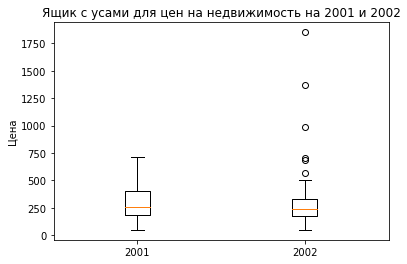

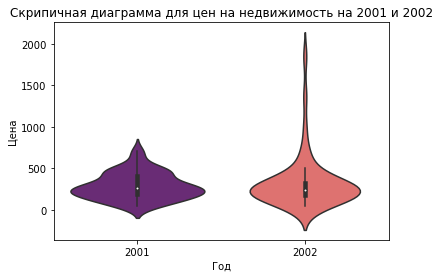

In [6]:
#строим ящик с усами
grouped_data = df.groupby('Year')['Price'].apply(list)
data = [grouped_data[year] for year in grouped_data.index]

plt.boxplot(data)
plt.xticks(range(1, len(grouped_data.index) + 1), grouped_data.index)
plt.ylabel('Цена')
plt.title('Ящик с усами для цен на недвижимость на 2001 и 2002')

plt.show()

#строим скрипичную диаграмму 

sns.violinplot(x='Year', y='Price', palette = 'magma', data=df)

plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Скрипичная диаграмма для цен на недвижимость на 2001 и 2002')

plt.show()


**(2 БАЛЛА)**. Сформулируйте нулевую и альтернативную гипотезу. Выберите $\alpha$. Обоснуйте свой выбор касательно альтернативы (одно- или двусторонняя гипотеза). Выберите критерий, которым Вы будете проверять гипотезу, выпишите его формулу и распределение, которому этот критерий подчиняется при справедливости нулевой гипотезы. Обоснуйте свой выбор. Постарайтесь красиво записать гипотезы (посмотрите в оформление ячеек из тетрадки с семинара по гипотезам)

- $H_0$: среднее значение цены на недвижимость в 2001 году равно аналогичному значению за следующий год: $$μ 1 = μ 2$$
- $H_1$: среднее значение цены на недвижимость в 2001 году не равно аналогичному значению за следующий год: $$μ 1 ≠ μ 2$$
 
 Выберем уровень значимости 𝛼 = 0,05.
 Так как нулевая гипотеза о равенстве средних, используем двувыборочный тест 
 
 **Теперь проверим предпосылки о нормальности распределения выборки**

Для начала построим гистограммы распределения значений для каждого года


Text(0.5, 1.0, 'Распределение цен на недвижимость в 2001 году')

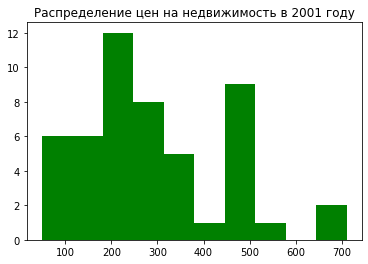

In [21]:
print('Для начала построим гистограммы распределения значений для каждого года')
df[df.Year == 2001]['Price'].hist(bins = 10, grid = False, color = 'g').set_title('Распределение цен на недвижимость в 2001 году')

Text(0.5, 1.0, 'Распределение цен на недвижимость в 2002 году')

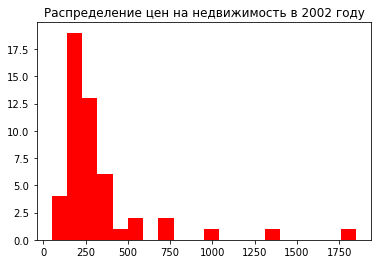

In [19]:
df[df.Year == 2002]['Price'].hist(bins = 20, grid = False, color = 'r').set_title('Распределение цен на недвижимость в 2002 году')

**Кажется, наше распределение не особо похоже на нормальное.**
**Проведем тесты на нормальность распределения**

In [43]:
from scipy.stats import skewtest
skewtest(df[df['Year'] == 2001])

SkewtestResult(statistic=array([2.01790655, 1.03270991]), pvalue=array([0.04360099, 0.30173968]))

In [44]:
from scipy.stats import kurtosis
kurtosis(df[df['Year'] == 2001])

array([-0.05239523, -3.        ])

In [47]:
skewtest(df[df['Year'] == 2002])

SkewtestResult(statistic=array([6.02942586, 1.03270991]), pvalue=array([1.64543183e-09, 3.01739676e-01]))

In [46]:
kurtosis(df[df['Year'] == 2002])

array([11.00241209, -3.        ])

**Промежуточные выводы: для обоих лет выборка рапределена распределена ненормально (на это указывают тесты на скошенность)**

Для нормального распределения показатель Skewness должен быть равен 0, а Kurtosis равен 3.

**(2 БАЛЛА)** Реализуйте Ваш критерий и сам механизм проверки гипотезы вручную. Сделайте вывод об отвержении или не отвержении гипотезы. Сравните свои результаты со встроенным тестом из пакета scipy.stats (если он там есть)

**Теперь мы резко забываем о том, что распределение у нас вообще-то не очень нормальное, и как ни в чем не бывало проводим t-test**

 ̶П̶о̶с̶л̶е̶ ̶о̶п̶е̶р̶а̶ц̶и̶и̶ ̶п̶о̶ ̶у̶д̶а̶л̶е̶н̶и̶ю̶ ̶п̶а̶м̶я̶т̶и̶: формула для t-теста
$$
t = \frac{{\bar{μ}_1 - \bar{μ}_2} - 0}{{\sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}}}
$$

Формула для подсчета степеней свободы по критерию Уэлча (т.к. дисперсии выборок неравны):
$$
y = \frac{{\left(\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}\right)^2}}{{\frac{{\left(\frac{{s_1^2}}{{n_1}}\right)^2}}{{n_1 - 1}} + \frac{{\left(\frac{{s_2^2}}{{n_2}}\right)^2}}{{n_2 - 1}}}}
$$

Реализация:

In [79]:
Meanx = df[df['Year'] == 2001]['Price'].mean()
varx = df[df['Year'] == 2001]['Price'].std()**2
Meany  = df[df['Year'] == 2002]['Price'].mean()
vary = df[df['Year'] == 2002]['Price'].std()**2
nx = df[df['Year'] == 2001].shape[0]
ny = df[df['Year'] == 2002].shape[0]

t_nabl = (Meanx-Meany)/np.sqrt((varx/nx)+(vary/ny))
a = (varx/nx + vary/ny)**2/(1/(nx-1)*(varx/nx)**2+1/(ny-1)*(vary/ny)**2)
t_krit = stats.t.ppf(1-0.01/2, a)

print(f't-критическое: {t_krit} \nt-наблюдаемое: {t_nabl}')

t-критическое: 2.6459565469056376 
t-наблюдаемое: -0.8057258725189664


**Нулевая гипотеза не отвегается - t-наблюдаемое по модулю меньше t-критического (0,81 < 2,65)**
Теперь посчитаем с помощью встроенных функций (наконец-то):

In [80]:
from scipy.stats import ttest_ind
ttest_ind(a = df[df['Year'] == 2001]['Price'], b = df[df['Year'] == 2002]['Price'], equal_var = False)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42305786816462243)

**Результаты получились аналогичные: мы не отвергает нулевую гипотезу, т.к. p-value меньше уровня значимости.**

## Несвязанные выборки

### mtcars
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон); 
2. cyl — количество цилиндров мотора;
3. disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 
11. carb — количество карбюраторов.



In [36]:
df = pd.read_csv('mtcars.csv', index_col=0)
df.head(32)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
manufacturer,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


Мы хотим ответить на следующие вопросы:

- Влияет ли тип двигателя на расход топлива? 
- Влияет ли объем мотора на расход топлива? 



**(1 БАЛЛ)**. Постройти графики для каждого вопроса. Для первого вопроса можете вновь использовать violinplot, но можете подобрать и другой график. Подумайте, какой график подходит для второго вопроса и нарисуйте его. Попробуйте сделать выводы на основе этих графиков (как распределены признаки, их средние и дисперсии).

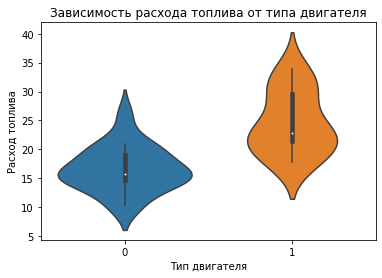

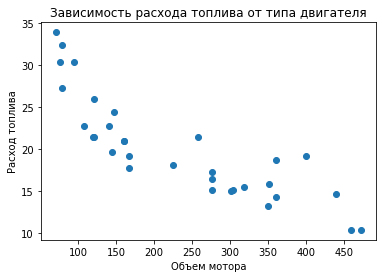

In [7]:
sns.violinplot(x='vs', y='mpg', data=df)

plt.xlabel('Тип двигателя')
plt.ylabel('Расход топлива')
plt.title('Зависимость расхода топлива от типа двигателя')

plt.show()


plt.scatter(df['disp'], df['mpg'])

plt.xlabel('Объем мотора')
plt.ylabel('Расход топлива')
plt.title('Зависимость расхода топлива от типа двигателя')

plt.show()


МЕСТО ДЛЯ ВАШИХ ВЫВОДОВ

**(2 БАЛЛА)**. Реализуйте решение для первого вопроса. Подумайте как можно измерить влияние типа двигателя на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

 - $H_0$: тип двигателя не оказывает существенного влияния на расход топлива.
 - $H_1$: тип двигателя оказывает существенное влияния на расход топлива.
 
 Выберем 𝛼 = 0,01.
 
 Для проверки гипотезы о независимости переменных (в гипотезах указано именно влияние типа двигателя на расход топлива, т.к. обратное невозможно - эта числовая переменная не может влиять на категориальную переменную (есть быть точнее, в нашем случае - бинарную), может быть только взаимосвязь) воспользуемся критерием Хи-квадрат.
 
 При верной нулевой гипотезе критерий подчиняется распределению Хи-квадрат с (m-1)х(n-1) степенями свободы, где m - число столбцов, n - число строчек

Для подсчета Хи-квадрата нужно преобразовать числовую переменную расхода топлива. Для этого разобьем ее на две части: верхнюю и нижнюю по медиане

In [14]:
df['mpg'].median()

19.2

Разделим значения расхода топлива на две группы, приняв за их "границу" значение медианы, равное 19.2

In [37]:
df['type'] = df['mpg'].apply(lambda x: 'High' if x > 19.2 else 'Low')
table = df.groupby('vs')['type'].value_counts().unstack()

table.head()

type,High,Low
vs,,
0,4,14
1,11,3


Рассчитаем Хи-квадрат вручную:

In [38]:
n = table.sum().sum()
vs0 = table.loc[0].sum()
vs1 = table.loc[1].sum()
p0 = vs0/n
p1 = vs1/n
n_high = table['High'].sum()
n_low = table['Low'].sum()
low0, high0 = n_low*p0, n_high*p0
low1, high1 = n_low*p1, n_high*p1

table1 = np.array([[low0, high0],
                        [low1, high1]])
chi0 = ((table - table1)**2/table1).sum().sum()
chi1 = scipy.stats.chi2.ppf(1-0.01, 1)
print(f'Наблюдаемое значение: {chi0}, критическое значение: {chi1}')

Наблюдаемое значение: 10.543168378462497, критическое значение: 6.6348966010212145


**Наблюдаемое значение оказалось выше критического, поэтому нулевая гипотеза отвергается - тип двигателя влияет на расход топлива**
Сделаем то же, но через scipy.stats:

In [41]:
scipy.stats.chi2_contingency(table, correction = False)

(10.041207594148771,
 0.001530768201808939,
 1,
 array([[8.4375, 9.5625],
        [6.5625, 7.4375]]))

Результаты получились аналогичными



**Вывод по пункту: с помощью проведенных тестов мы установили, что тип двигателя влияет

**(2 БАЛЛА)**. Реализуйте решение для второго вопроса. Подумайте как можно измерить влияние объема мотора на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

МЕСТО ДЛЯ ВАШИХ МЫСЛЕЙ И ГИПОТЕЗ

In [ ]:
# МЕСТО ДЛЯ ВАШЕГО КОДА